# Correlation 

In [2]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

# Visualization 
* Heatmaps 

A heatmap can be used to visually show a matrix. The colors represent the numbers or elements of the matrix. Heatmaps are particularly useful for illustrating the covariance and correlation matrices. 

Range [-1, 1]

* -1 negative correlation (strong)
* 1 positive correlation (strong)
* 0 no correlation 

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
x = np.arange(21)
y = 5 + 2 * x + 2 * np.random.randn(21)

In [5]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [6]:
y

array([ 4.5378852 ,  7.02698656,  7.26012572, 15.60167642, 15.78718332,
       14.71708508, 13.55559038, 20.90453377, 20.66381464, 26.67255139,
       22.23581861, 31.55268353, 30.50561728, 29.45020785, 33.27409896,
       37.2427878 , 36.03442047, 39.7983391 , 41.0272381 , 42.92472047,
       45.26752631])

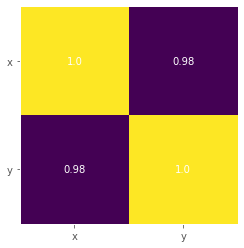

In [7]:
matrix = np.corrcoef(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()

| Name | Years of Experience | Annual Salary |
|------|---------------------|---------------|
| Ann  | 30                  | 120,000       |
| Rob  | 21                  | 105,000       |
| Tom  | 19                  | 90,000        |
| Ivy  | 10                  | 82,000        |

In [8]:
import numpy as np
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

In [9]:
x

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [10]:
y

array([ 2,  1,  4,  5,  8, 12, 18, 25, 96, 48])

In [11]:
r = np.corrcoef(x, y)
r

array([[1.        , 0.75864029],
       [0.75864029, 1.        ]])

These values are equal and both represent the Pearson correlation coefficient for x and y. In this case, it’s approximately 0.76

## SciPy Correlation Calculation
SciPy also has many statistics routines contained in scipy.stats. You can use the following methods to calculate the three correlation coefficients you saw earlier:

* pearsonr()
* spearmanr()
* kendalltau()

In [12]:
import numpy as np
import scipy.stats
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

In [13]:
scipy.stats.pearsonr(x, y)    # Pearson's r

(0.7586402890911869, 0.010964341301680832)

In [14]:
scipy.stats.spearmanr(x, y)   # Spearman's rho

SpearmanrResult(correlation=0.9757575757575757, pvalue=1.4675461874042197e-06)

In [15]:
scipy.stats.kendalltau(x, y)  # Kendall's tau

KendalltauResult(correlation=0.911111111111111, pvalue=2.9761904761904762e-05)

The lower the p-value, the more meaningful the result because it is less likely to be caused by noise

# Pandas Correlation Calculation

In [16]:
import pandas as pd
x = pd.Series(range(10, 20))
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

In [17]:
x

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64

In [18]:
y

0     2
1     1
2     4
3     5
4     8
5    12
6    18
7    25
8    96
9    48
dtype: int64

In [19]:
x.corr(y)                     # Pearson's r

0.7586402890911867

In [20]:
y.corr(x)

0.7586402890911869

In [21]:
x.corr(y, method='spearman')  # Spearman's rho

0.9757575757575757

In [22]:
x.corr(y, method='kendall')   # Kendall's tau

0.911111111111111

# Linear Correlation

Linear correlation measures the proximity of the mathematical relationship between variables or dataset features to a linear function. If the relationship between the two features is closer to some linear function, then their linear correlation is stronger and the absolute value of the correlation coefficient is higher.

# Pearson Correlation Coefficient
Consider a dataset with two features: x and y. Each feature has n values, so x and y are n-tuples. Say that the first value x₁ from x corresponds to the first value y₁ from y, the second value x₂ from x to the second value y₂ from y, and so on. Then, there are n pairs of corresponding values: (x₁, y₁), (x₂, y₂), and so on. Each of these x-y pairs represents a single observation.

The Pearson (product-moment) correlation coefficient is a measure of the linear relationship between two features. It’s the ratio of the covariance of x and y to the product of their standard deviations. It’s often denoted with the letter r and called Pearson’s r. You can express this value mathematically with this equation:

r = Σᵢ((xᵢ − mean(x))(yᵢ − mean(y))) (√Σᵢ(xᵢ − mean(x))² √Σᵢ(yᵢ − mean(y))²)⁻¹

Here, i takes on the values 1, 2, …, n. The mean values of x and y are denoted with mean(x) and mean(y). This formula shows that if larger x values tend to correspond to larger y values and vice versa, then r is positive. On the other hand, if larger x values are mostly associated with smaller y values and vice versa, then r is negative.

Here are some important facts about the Pearson correlation coefficient:

The Pearson correlation coefficient can take on any real value in the range −1 ≤ r ≤ 1.

The maximum value r = 1 corresponds to the case in which there’s a perfect positive linear relationship between x and y. In other words, larger x values correspond to larger y values and vice versa.

The value r > 0 indicates positive correlation between x and y.

The value r = 0 corresponds to the case in which there’s no linear relationship between x and y.

The value r < 0 indicates negative correlation between x and y.

The minimal value r = −1 corresponds to the case when there’s a perfect negative linear relationship between x and y. In other words, larger x values correspond to smaller y values and vice versa.

The above facts can be summed up in the following table:

| Pearson’s r Value | Correlation Between x and y          |
|-------------------|--------------------------------------|
| equal to 1        | perfect positive linear relationship |
| greater than 0    | positive correlation                 |
| equal to 0        | no linear relationship               |
| less than 0       | negative correlation                 |
| equal to -1       | perfect negative linear relationship |

In [23]:
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
z = np.array([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
                [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])

In [25]:
corr_matrix = np.corrcoef(xyz).round(decimals=2)
corr_matrix

array([[ 1.  ,  0.76, -0.97],
       [ 0.76,  1.  , -0.83],
       [-0.97, -0.83,  1.  ]])

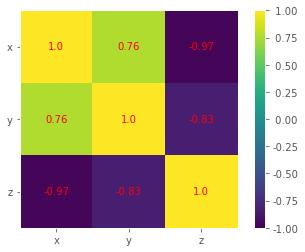

In [26]:
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()